### Import all the libraries and set up all the requirements that you will be needed(optional)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Read the train and test data sets, and check for the datatypes.

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


In [4]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [5]:
df = pd.concat([train, test])
df.head(2)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.82262,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.94496,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good


###  Clean the anomalies in the categorical variables.

In [6]:
df['Occupation'].replace({'_______':np.nan}, inplace=True)
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Occupation'].unique()

array(['Scientist', 'Lawyer', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [7]:
df['Credit_Mix'].replace({'_':np.nan}, inplace = True)
df['Credit_Mix'] = df['Credit_Mix'].fillna(df['Credit_Mix'].mode()[0])
df['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [8]:
df['SSN'].replace({'#F%$D@*&8':np.nan}, inplace=True)
df['SSN'] = df['SSN'].fillna(df['SSN'].mode()[0])
df['SSN'].unique()

array(['821-00-0265', '000-08-1349', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [9]:
df['Payment_Behaviour'].replace({'!@9#%8':np.nan}, inplace=True)
df['Payment_Behaviour'] = df['Payment_Behaviour'].fillna(df['Payment_Behaviour'].mode()[0])
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [10]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace({'NM':'No'})
df['Payment_of_Min_Amount'].unique()

array(['No', 'Yes'], dtype=object)

### Clean the anomalies for numerical variables

In [11]:
df['Age'] = df['Age'].map(lambda x: x.rstrip('_'))
df['Age'] = df['Age'].map(lambda x: x if (int(x)<=85)&(int(x)>0) else np.nan)
df['Age'] = df['Age'].astype('float')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age'].isnull().sum()

0

In [12]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [13]:
df['Amount_invested_monthly'].replace({'__10000__':np.nan}, inplace=True)
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].astype('float')
df[df['Amount_invested_monthly']<0]['Amount_invested_monthly'].sum()

0.0

In [14]:
df['Monthly_Balance'].replace({'__-333333333333333333333333333__':np.nan}, inplace=True)
df['Monthly_Balance'] = df['Monthly_Balance'].astype('float')
df[df['Monthly_Balance']<0]['Monthly_Balance'].sum()

0.0

In [15]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].map(lambda x: x.rstrip('_'))
df['Outstanding_Debt'] = df['Outstanding_Debt'].astype('float')
df[df['Outstanding_Debt']<0]['Outstanding_Debt'].sum()

0.0

In [16]:
df['Changed_Credit_Limit'].replace({'_':np.nan}, inplace=True)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].astype('float')
df[df['Changed_Credit_Limit']<0]['Changed_Credit_Limit'].sum()

-5788.66

In [17]:
# Negative value treatment for num_of_loan
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].map(lambda x: np.nan if(x<0) else x)
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.median()))
df[df['Changed_Credit_Limit']<0]['Changed_Credit_Limit'].sum()

0.0

In [18]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('str')
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].map(lambda x: x.rstrip('_'))
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].astype('float')
df[df['Num_of_Delayed_Payment']<0]['Num_of_Delayed_Payment'].sum()

-1564.0

In [19]:
# Negative value treatment for num_of_loan
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].map(lambda x: np.nan if(x<0) else x)
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.median()))
df[df['Num_of_Delayed_Payment']<0]['Num_of_Delayed_Payment'].sum()

0.0

In [20]:
df['Num_of_Loan'] = df['Num_of_Loan'].map(lambda x: x.rstrip('_'))
df['Num_of_Loan'] = df['Num_of_Loan'].astype('float')
df[df['Num_of_Loan']<0]['Num_of_Loan'].sum()

-585000.0

In [21]:
# Negative value treatment for num_of_loan
df['Num_of_Loan'] = df['Num_of_Loan'].map(lambda x: np.nan if(x<0) else x)
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.median()))
df[df['Num_of_Loan']<0]['Num_of_Loan'].sum()

0.0

In [22]:
df['Annual_Income'] = df['Annual_Income'].map(lambda x: x.rstrip('_'))
df['Annual_Income'] = df['Annual_Income'].astype('float')
df[df['Annual_Income']<0]['Annual_Income'].sum()

0.0

###  Convert the Credit_History_Age datatype variable into float data types by taking only year and month.

In [23]:
df['Credit_History_Age'].replace({np.nan:'None'}, inplace=True)
c_age = []
res = []
for i in df['Credit_History_Age']:
    l = i.split(" ")
    for j in l:
        if(j.isnumeric()):
            res.append(j)
    c_age.append(".".join(res))
    res = []
    
df['Credit_History_Age'] = c_age

In [24]:
df['Credit_History_Age'].replace({'':np.nan}, inplace=True)
df['Credit_History_Age'] = df['Credit_History_Age'].astype('float')

In [25]:
df['Month'].replace({'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
       'August':8, 'September':9, 'October':10, 'November':11, 'December':12}, inplace=True)
df['Month']= df['Month'].astype('int')

###  Find out the missing values in the data frame and handle them in the best way possible. One way of solving this is by imputing the missing values with a customer-wise median

In [26]:
for i in df.select_dtypes(exclude='O').columns:
    df[i]=df[i].fillna(df.groupby('Customer_ID')[i].transform(lambda x:x.median()))


In [27]:
i = list(df.select_dtypes(include='O').columns)
i.remove('Credit_Score')
for j in i:
    df[j] = df[j].fillna(df[j].mode()[0])

### Perform Univariate, Bivariate, and Multivariate analyses to find the factors that affect the Target variables.

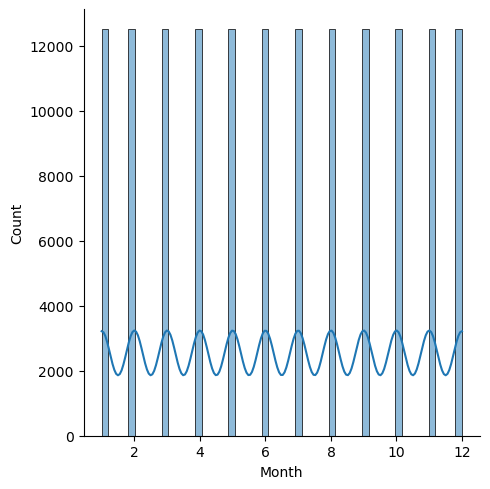

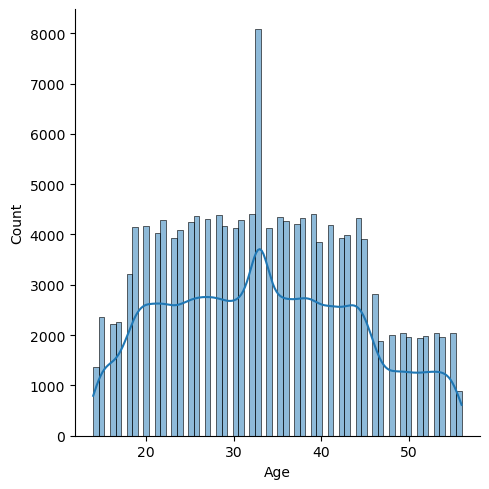

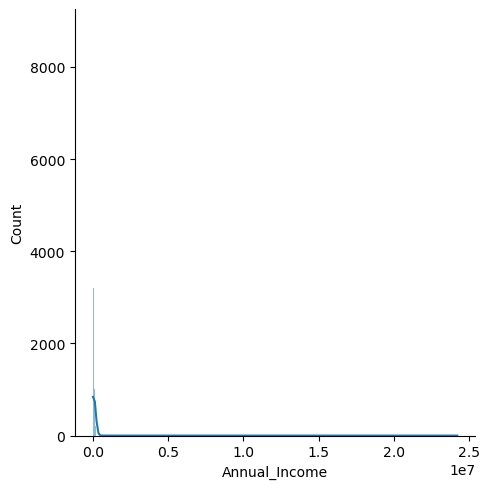

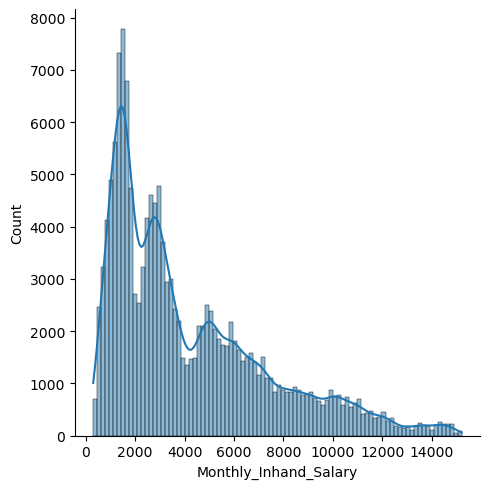

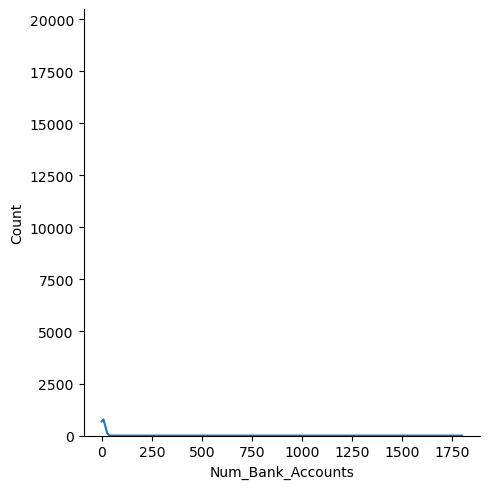

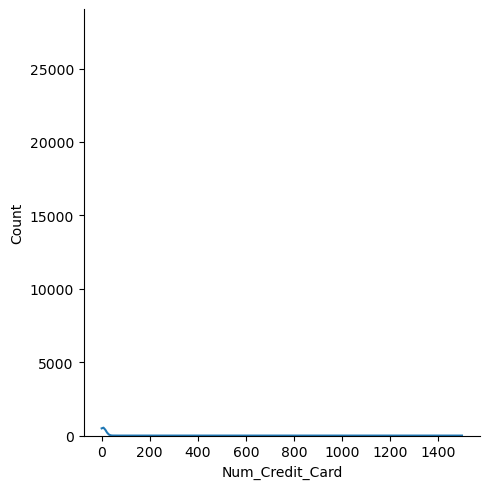

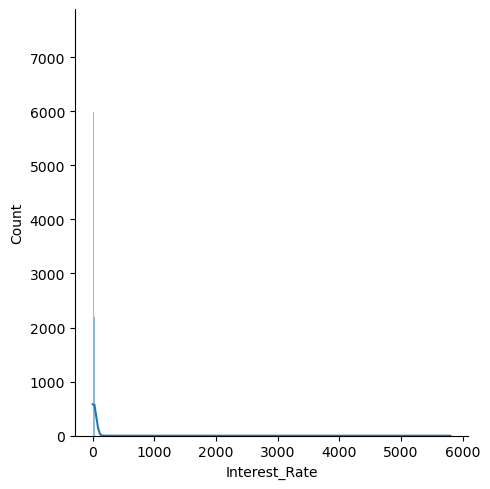

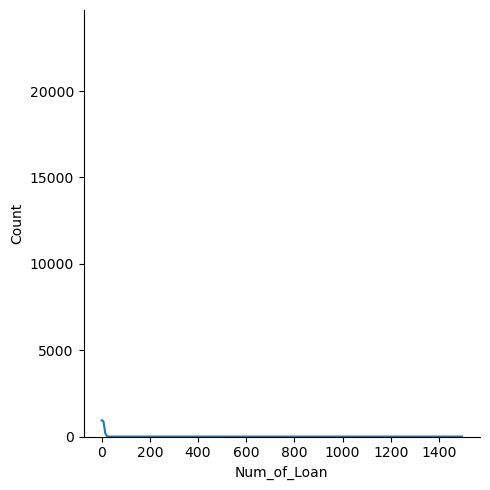

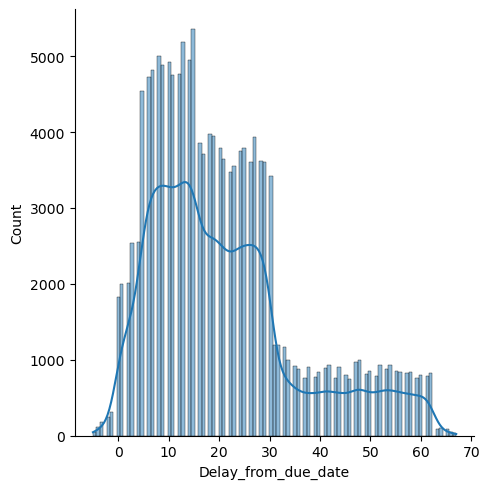

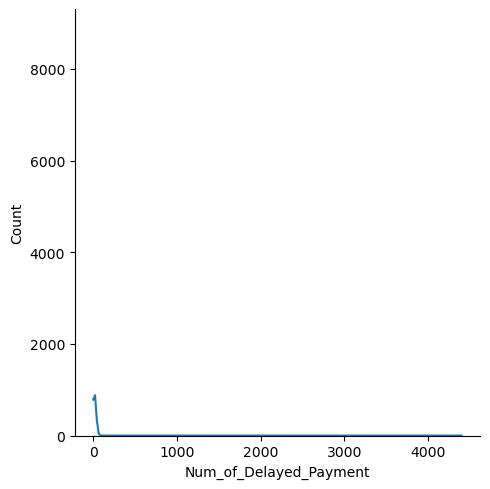

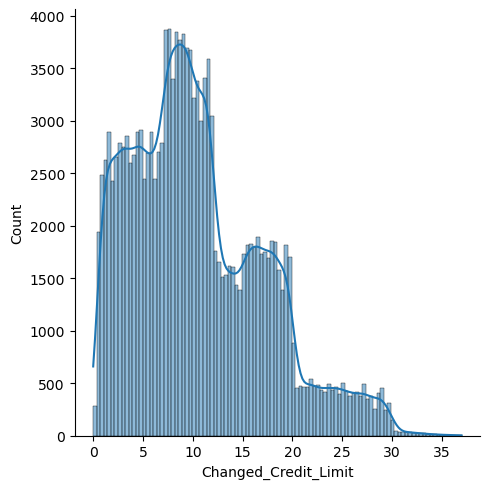

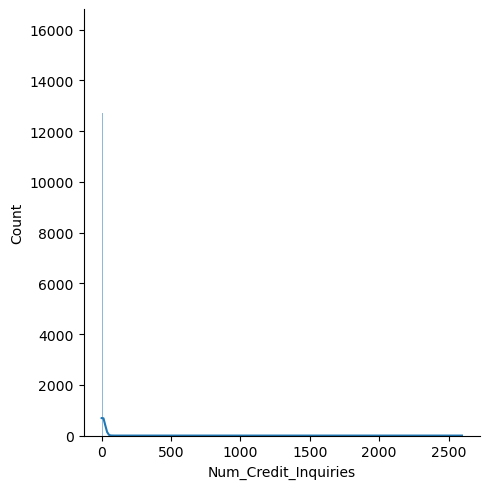

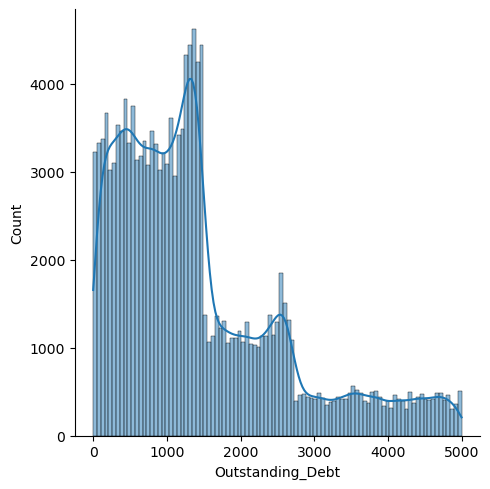

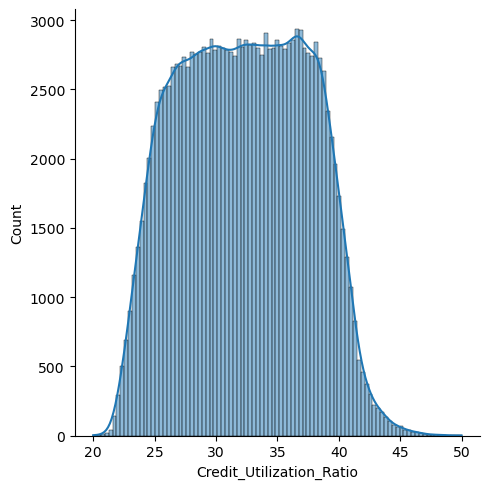

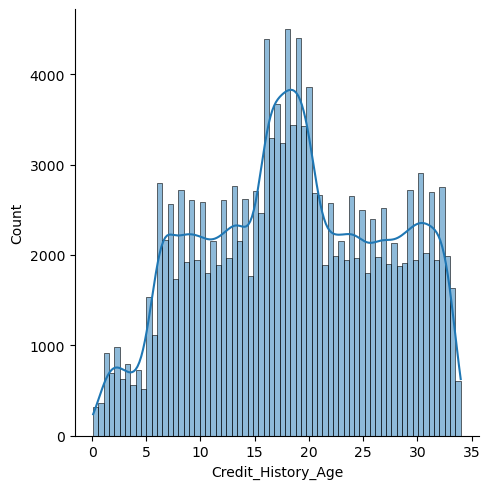

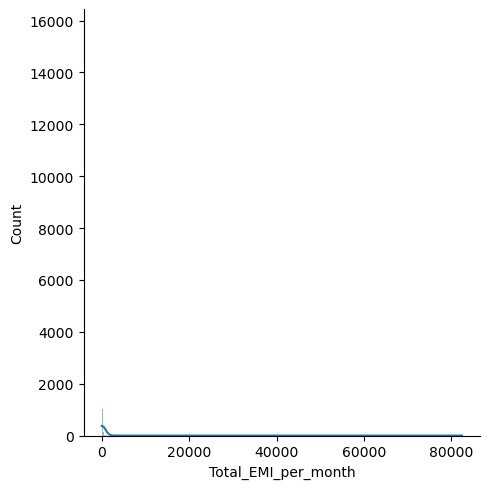

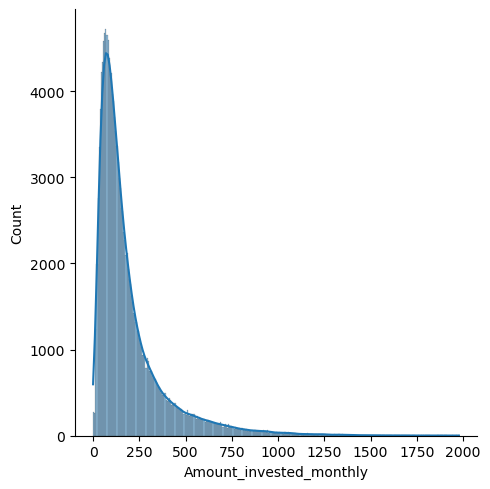

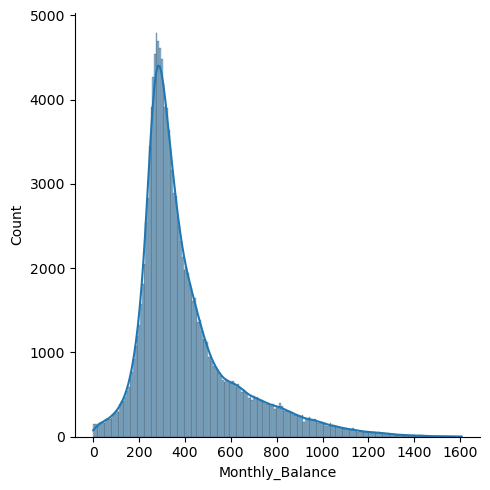

In [28]:
# Univariate
for i in df.select_dtypes(exclude='O').columns:
    sns.displot(df[i], kde=True)
    plt.show()

In [29]:
df.select_dtypes(exclude='O').std()

Month                       3.452064e+00
Age                         1.062104e+01
Annual_Income               1.404215e+06
Monthly_Inhand_Salary       3.182841e+03
Num_Bank_Accounts           1.170695e+02
Num_Credit_Card             1.291430e+02
Interest_Rate               4.615372e+02
Num_of_Loan                 6.044519e+01
Delay_from_due_date         1.486015e+01
Num_of_Delayed_Payment      2.165833e+02
Changed_Credit_Limit        6.654203e+00
Num_Credit_Inquiries        1.925278e+02
Outstanding_Debt            1.155127e+03
Credit_Utilization_Ratio    5.113315e+00
Credit_History_Age          8.315153e+00
Total_EMI_per_month         8.403760e+03
Amount_invested_monthly     1.930797e+02
Monthly_Balance             2.141839e+02
dtype: float64

- No columns with 0 variance is found
- All the columns conveys some useful information
- Hence no columns can be removed as unwanted with 0 varinace condition

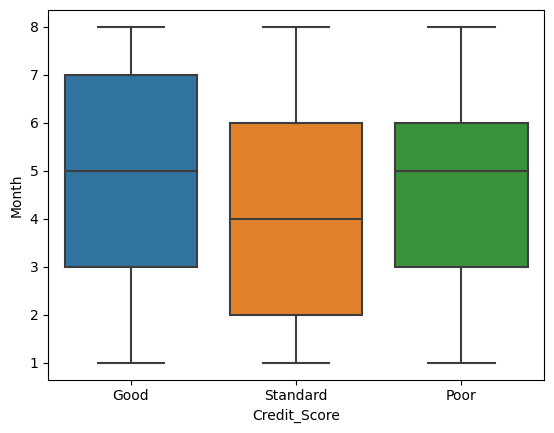

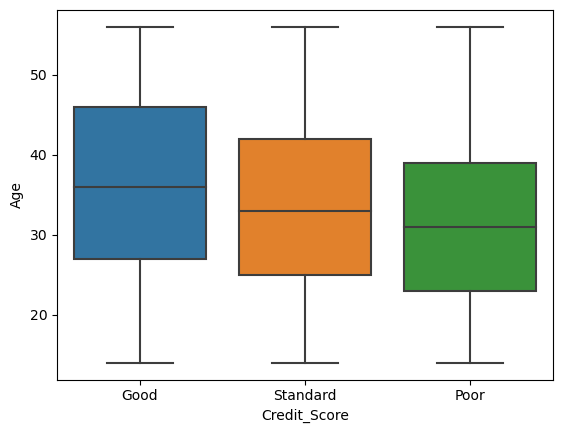

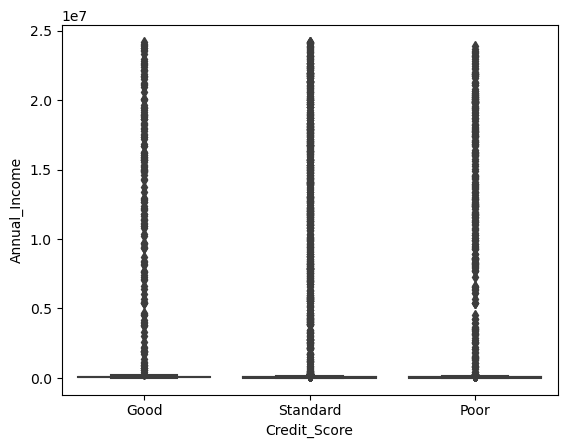

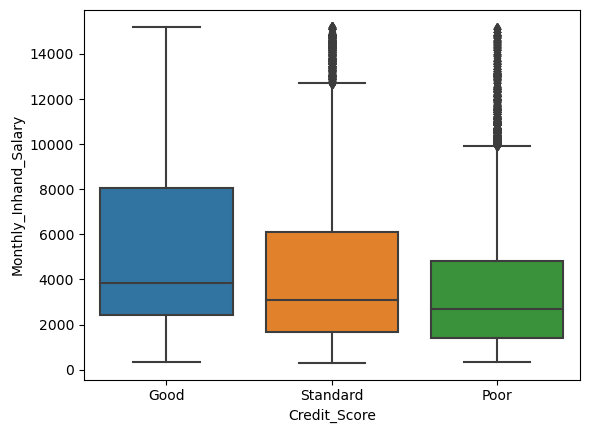

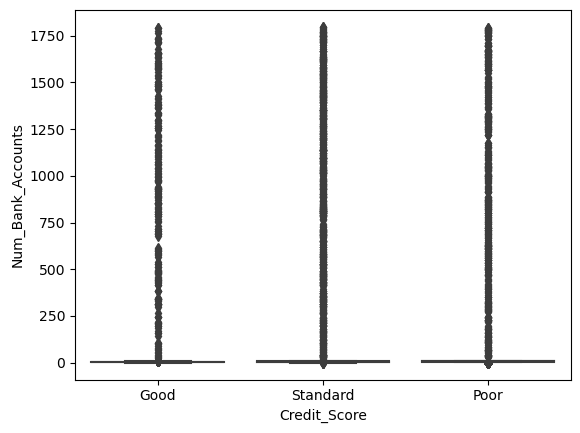

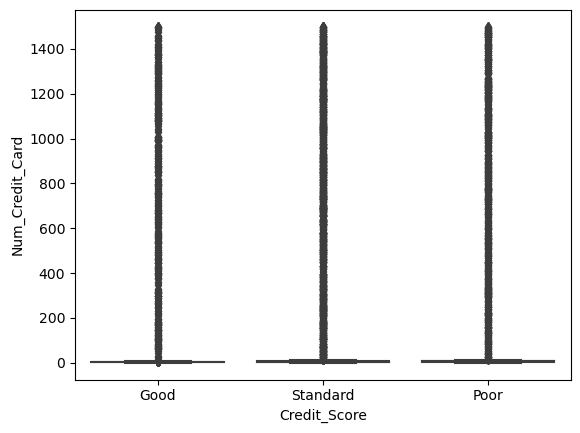

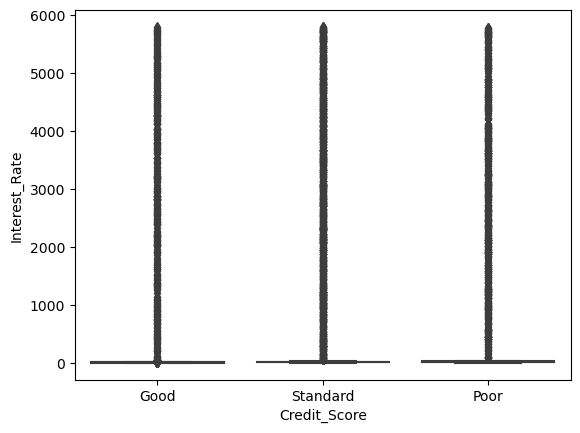

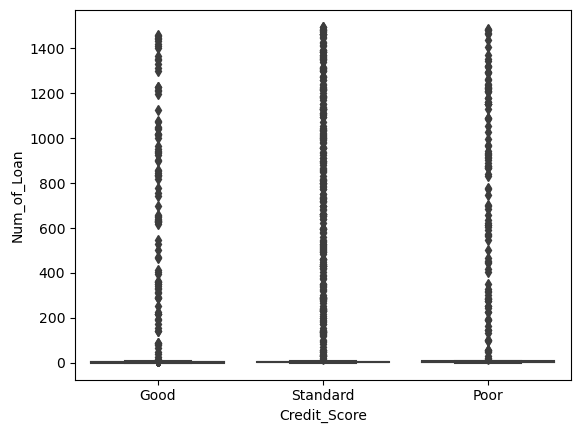

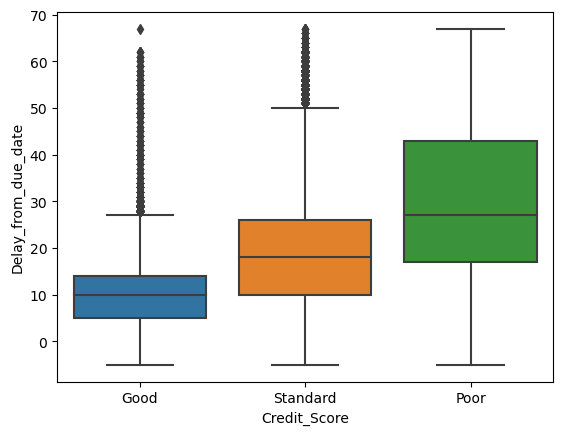

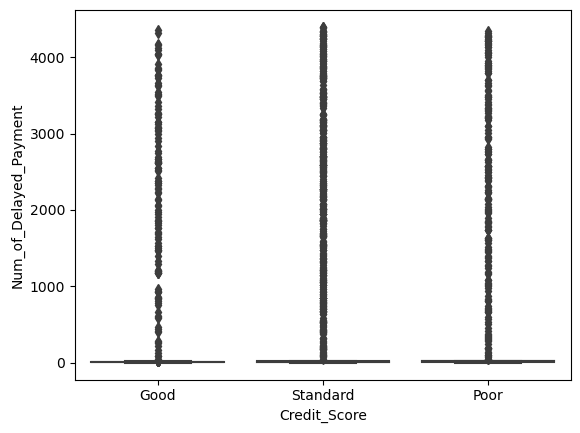

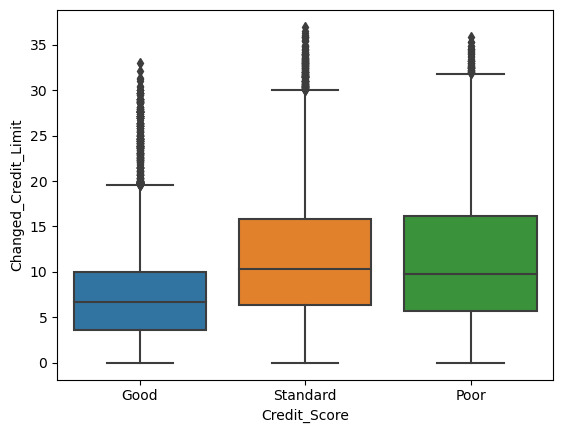

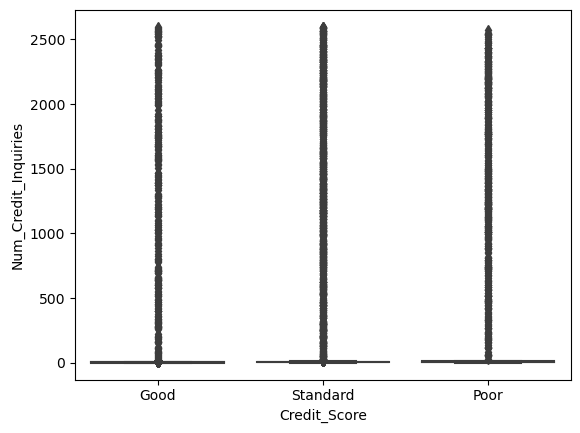

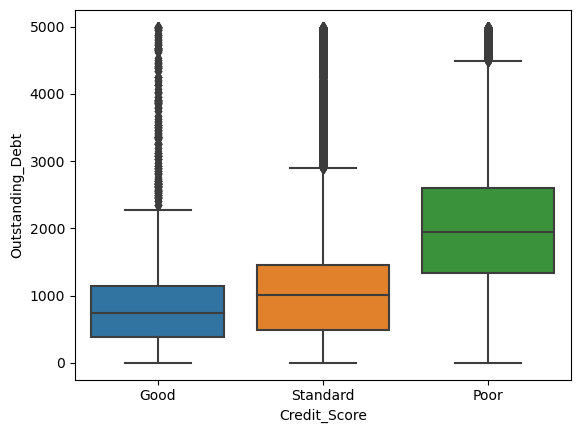

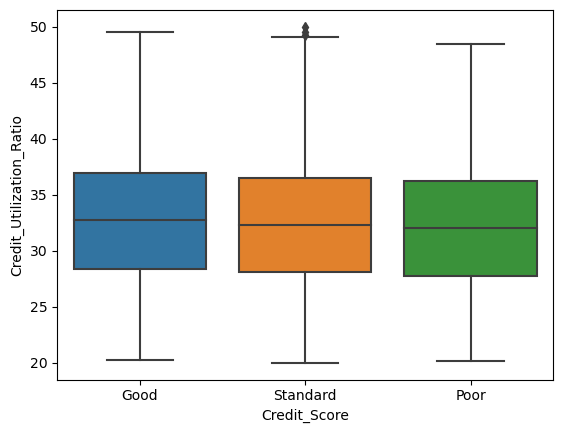

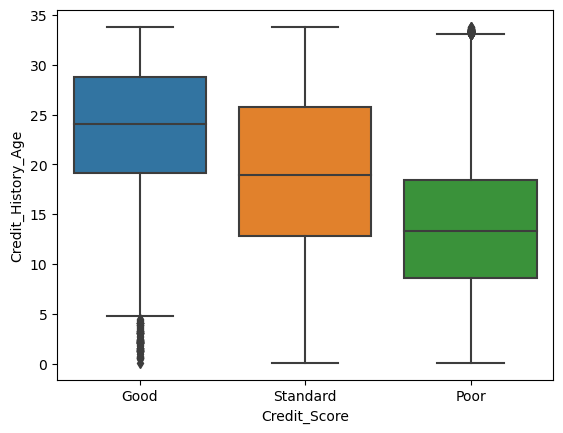

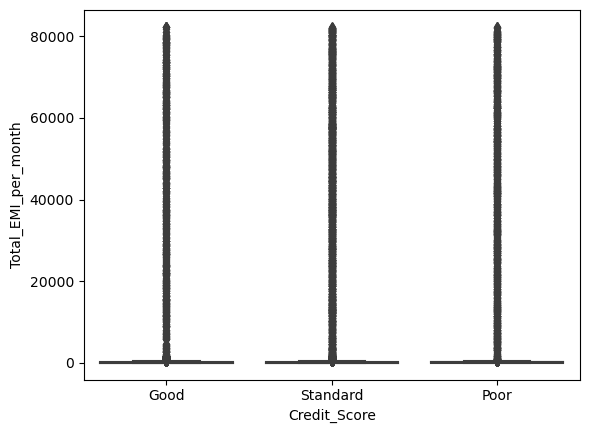

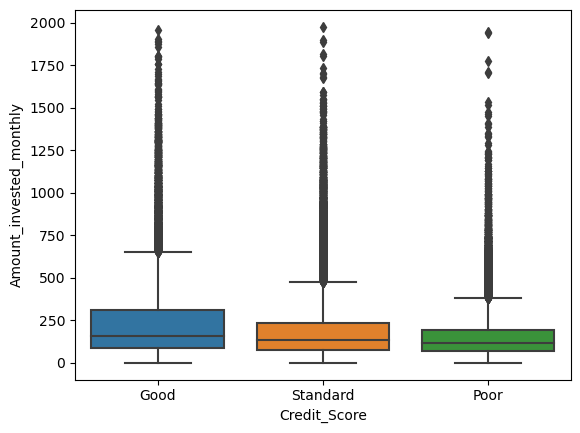

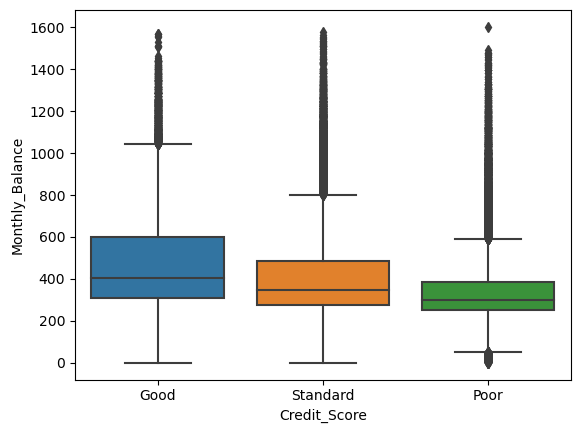

In [30]:
# Bivariate
for i in df.select_dtypes(exclude='O').columns:
    sns.boxplot(y = df[i], x=df['Credit_Score'])
    plt.show()

- Age, Monthly_inhand_salary, credit_utilization_ratio, Amount_invested_monthly, are the columns whose average remained constant for all the credit score group. Hence these columns doesnt impact much on target variable

<Axes: >

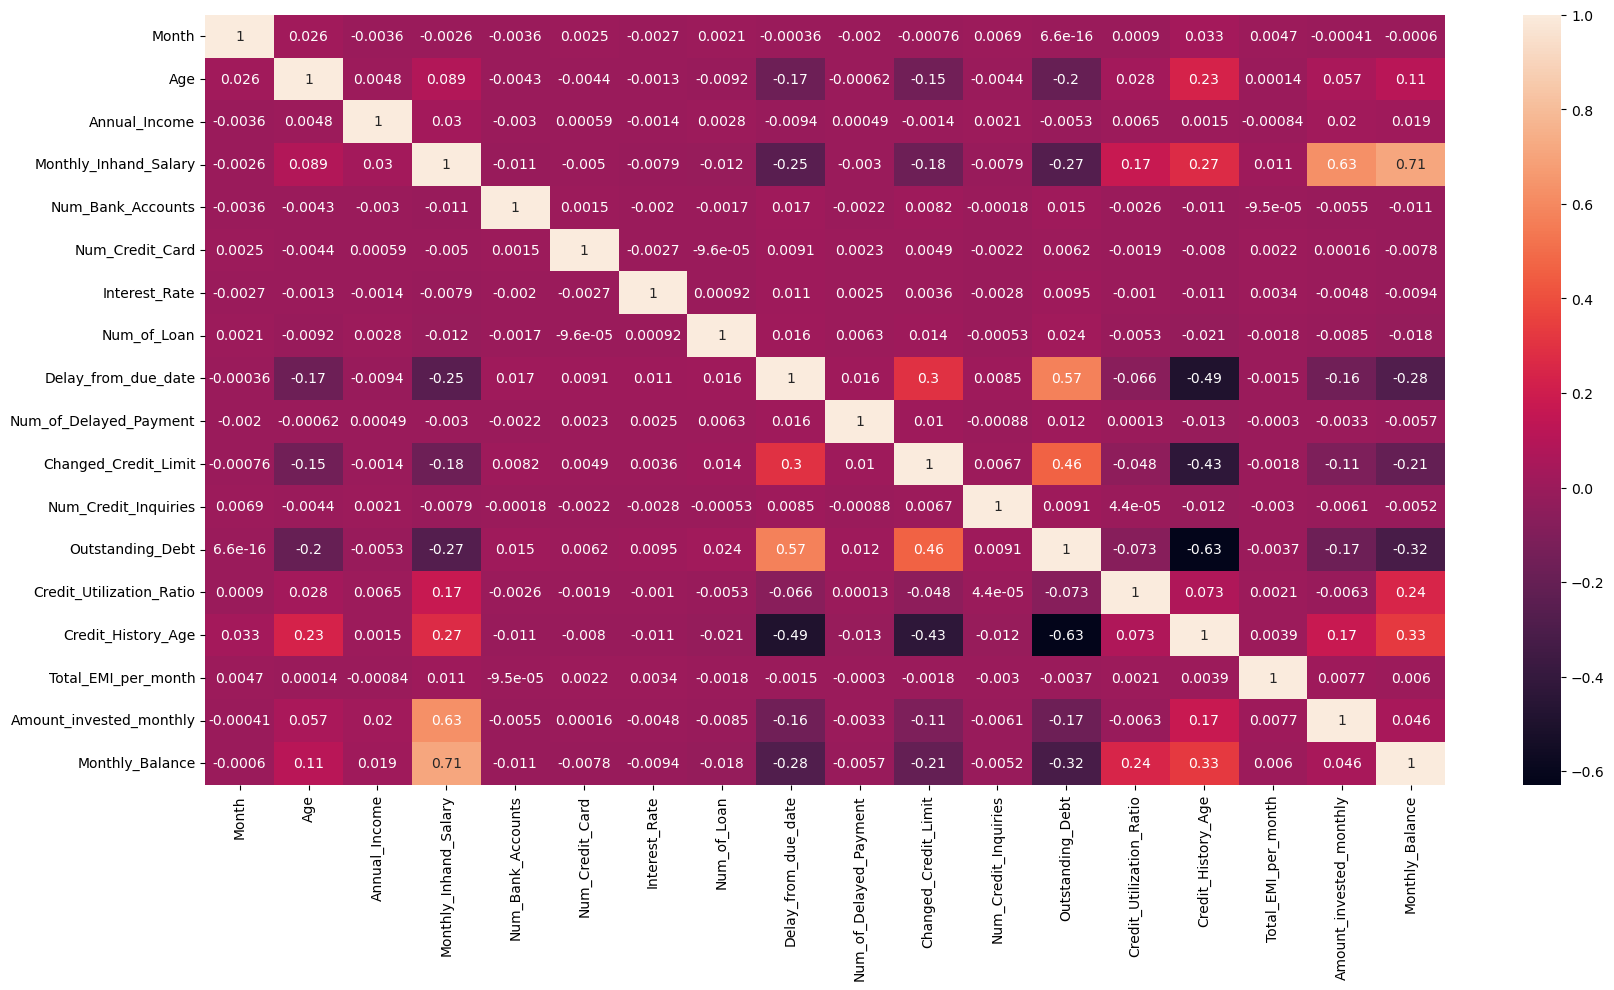

In [31]:
# Multivariate
plt.figure(figsize = (20,10))
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot = True)

- Monthly_inhand_salary, Amount_invested_monthly and monthly balance are the variables which are highly correlated with each other. Hence any one of the column can be deleted to avoid multicollinearity problem

###  Separate your Train dataset and test data set if you combined them in the initial steps.

In [32]:
train = df.dropna()
test = df.iloc[100000:, :]

In [33]:
print('Train Shape: ' ,train.shape)
print('Test Shape: ' ,test.shape)

Train Shape:  (100000, 28)
Test Shape:  (50000, 28)


### Perform the Statistical analysis to prove where the independent variables have an effect on the Target variables

### 1. Check whether the Annual income across all the target variables is significantly the same. Let's fix the alpha is 0.05. Make sure the data is normal and the variance is equal. If not use a Non-parametric statistical test.

𝐻0 : The averages of all treatments are the same.

𝐻1 : At least one treatment has a different average.

In [34]:
from scipy import stats
from scipy.stats import shapiro


In [35]:
s1 = train[train['Credit_Score']=='Good']['Annual_Income']
s2 = train[train['Credit_Score']=='Standard']['Annual_Income']
s3 = train[train['Credit_Score']=='Poor']['Annual_Income']

In [36]:
# Shapiro test for normality
print(shapiro(s1))
print(shapiro(s2))
print(shapiro(s3))

ShapiroResult(statistic=0.07272845506668091, pvalue=0.0)
ShapiroResult(statistic=0.07739996910095215, pvalue=0.0)
ShapiroResult(statistic=0.06670945882797241, pvalue=0.0)


- p < 0.05. Hence the data is not normal. Hence we can proceed with non paramteric test

In [37]:
h_statistic, p_value = stats.kruskal(s1,s2,s3)
print(p_value)

0.0


- p<0.05, we tend to reject H0. Hence there exists signinficant difference between 'Annual_Income' for different credit score

### 2. Check if there is an independence of the Occupation and Credit Score. The significant level is 0.05

In [38]:
from scipy.stats import chi2_contingency

cr = pd.crosstab(train['Occupation'], train['Credit_Score'])
chi2_contingency(cr)

Chi2ContingencyResult(statistic=168.10480126791416, pvalue=6.212511377729724e-22, dof=28, expected_freq=array([[1117.99388, 1818.46458, 3334.54154],
       [1132.9694 , 1842.8229 , 3379.2077 ],
       [1111.5758 , 1808.0253 , 3315.3989 ],
       [1085.19036, 1765.10826, 3236.70138],
       [1132.078  , 1841.373  , 3376.549  ],
       [1100.70072, 1790.33652, 3282.96276],
       [1084.8338 , 1764.5283 , 3235.6379 ],
       [2431.20436, 3954.45726, 7251.33838],
       [1064.86644, 1732.05054, 3176.08302],
       [1121.55948, 1824.26418, 3345.17634],
       [1111.04096, 1807.15536, 3313.80368],
       [1053.81308, 1714.07178, 3143.11514],
       [1122.98572, 1826.58402, 3349.43026],
       [1108.0102 , 1802.2257 , 3304.7641 ],
       [1049.1778 , 1706.5323 , 3129.2899 ]]))

- p < 0.05. We fail to reject H0. Hence credit score and occupation variables are dependent of each other

### 3. Check if there is a relationship between the Payment Behaviour and Credit Score.

In [39]:
cr = pd.crosstab(train['Payment_Behaviour'], train['Credit_Score'])
chi2_contingency(cr)

Chi2ContingencyResult(statistic=1249.38890936874, pvalue=3.1907303798466974e-262, dof=10, expected_freq=array([[ 2446.17988,  3978.81558,  7296.00454],
       [ 3127.0312 ,  5086.2492 ,  9326.7196 ],
       [ 2021.6952 ,  3288.3732 ,  6029.9316 ],
       [ 1858.569  ,  3023.0415 ,  5543.3895 ],
       [ 2471.13908,  4019.41278,  7370.44814],
       [ 5903.38564,  9602.10774, 17607.50662]]))

- p < 0.05. We fail to reject H0. Hence credit score and Payment Behaviour variables are dependent of each other

### 4. Check Statistically that the Credit_Utilization_Ratio median values are significantly not different across the target variable classes.

In [40]:
t1 = train[train['Credit_Score']=='Good']['Credit_Utilization_Ratio']
t2 = train[train['Credit_Score']=='Standard']['Credit_Utilization_Ratio']
t3 = train[train['Credit_Score']=='Poor']['Credit_Utilization_Ratio']

In [41]:
# Shapiro test for normality
print(shapiro(s1))
print(shapiro(s2))
print(shapiro(s3))

ShapiroResult(statistic=0.07272845506668091, pvalue=0.0)
ShapiroResult(statistic=0.07739996910095215, pvalue=0.0)
ShapiroResult(statistic=0.06670945882797241, pvalue=0.0)


- p < 0.05. Hence the data is not normal. Hence we can proceed with non paramteric test

In [42]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
t1 = pd.DataFrame(t1)
t1_trans = pt.fit_transform(t1[['Credit_Utilization_Ratio']])

t2 = pd.DataFrame(t2)
t2_trans = pt.fit_transform(t2[['Credit_Utilization_Ratio']])

t3 = pd.DataFrame(t3)
t3_trans = pt.fit_transform(t3[['Credit_Utilization_Ratio']])

In [43]:
stats.kruskal(t1_trans, t2_trans, t3_trans)

KruskalResult(statistic=array([0.0346492]), pvalue=array([0.98282461]))

- Since Credit_Utilization_Ratio have some outliers and kruskal wallis test is highly affected by distribution of each sample and the extreme values, we tend to normalize the group. 
- P > 0.05. Hence it is depicted that the groups of credit score divided based on credit_utilization_ratio is the same and hence it doesnt add value to the target variable

### Encode the categorical variables with related technologies. Change the target variable classes as (poor to 0, Standard to 1, Good to 2)

In [44]:
train['Credit_Score'].replace({'Standard':1, 'Good':2, 'Poor':0}, inplace=True)

In [50]:
!pip install category_encoders

     -------------------------------------- 81.9/81.9 kB 770.1 kB/s eta 0:00:00


In [51]:
from catboost import CatBoostClassifier
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.model_selection import train_test_split

X = train.drop(['ID', 'Customer_ID', 'Name', 'Occupation', 'Credit_Score', 'SSN', 'Type_of_Loan'], axis=1)
y = train['Credit_Score']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3)
cat_encoder = CatBoostEncoder()
X_train_encoded = cat_encoder.fit_transform(xtrain, ytrain)
X_test_encoded = cat_encoder.transform(xtest)

### Scale the numerical features

In [52]:
from sklearn.preprocessing import StandardScaler

xtrain_scaled = X_train_encoded.copy()
xtest_scaled = X_test_encoded.copy()

l =['Annual_Income','Monthly_Inhand_Salary', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly', 'Age', 'Monthly_Balance']
ss=StandardScaler()
for i in l:
    xtrain_scaled[i] = ss.fit_transform(xtrain_scaled[[i]])
    xtest_scaled[i] = ss.transform(xtest_scaled[[i]])

### Build the base model. Observe how the model is performing.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr = LogisticRegression()
lr.fit(xtrain_scaled, ytrain)
ypred_lr = lr.predict(xtest_scaled)
print(classification_report(ytest, ypred_lr))

              precision    recall  f1-score   support

           0       0.63      0.38      0.48      8702
           1       0.58      0.85      0.69     15900
           2       0.50      0.13      0.20      5398

    accuracy                           0.58     30000
   macro avg       0.57      0.45      0.45     30000
weighted avg       0.58      0.58      0.54     30000



- The model's accuracy is very low of only 59%
- But the probability that the model predicts a class and it is correct is atleast 50%
- Here all the classes needs to be predicted correctly and hence measures to be taken to improve f1-score 

### Build other models and choose the model which gives the best results.

In [60]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_encoded, ytrain)
ypred_dt = dt.predict(X_test_encoded)
print(classification_report(ytest, ypred_dt))

ImportError: cannot import name 'XGBClassifier' from 'sklearn.tree' (C:\Users\user\anaconda3\lib\site-packages\sklearn\tree\__init__.py)

- The accuracy of the model has increased and the f1 score for all the classes has also increased from the base model
- Hence fine tuning and feature selection helps improve accuracy

# Perform Feature selection using different feature selection methods.

- Credit_utilization_ratio can be removed since its variance is very low when compared with different credit groups

In [55]:
X_train_encoded.drop('Credit_Utilization_Ratio', axis=1, inplace=True)
X_test_encoded.drop('Credit_Utilization_Ratio', axis=1, inplace=True)

In [56]:
!pip install mlxtend

In [57]:
# Feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

dt = DecisionTreeClassifier()
sfs_forward= sfs(estimator = dt,
                   k_features=15,
                   forward = True,
                   verbose=2,
                   scoring = "accuracy")
sfs_forward.fit(X_train_encoded, ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   19.2s finished

[2023-12-31 21:54:29] Features: 1/15 -- score: 0.7929142857142857[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   23.4s finished

[2023-12-31 21:54:52] Features: 2/15 -- score: 0.7945[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:   28.6s finished

[2023-12-31 21:55:21] Features: 3/15 -- score: 0.7927428571428571[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   

SequentialFeatureSelector(estimator=DecisionTreeClassifier(),
                          k_features=(15, 15), scoring='accuracy', verbose=2)

In [58]:
sfs_forward.k_feature_names_
X_train_encoded.columns

Index(['Month', 'Age', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

### Tune the final model using Grid search CV or Randomized CV or any other methods.

In [62]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
xgb_grid.fit(X_train_encoded, ytrain)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3} 



In [63]:
xgb_grid_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'))

xgb_model = xgb_grid_model.fit(X_train_encoded, ytrain)

ypred_xg = xgb_model.predict(X_test_encoded)
print(classification_report(ytest,ypred_xg))



              precision    recall  f1-score   support

           0       0.73      0.64      0.68      8702
           1       0.72      0.77      0.74     15900
           2       0.59      0.58      0.58      5398

    accuracy                           0.70     30000
   macro avg       0.68      0.66      0.67     30000
weighted avg       0.70      0.70      0.70     30000



In [64]:
# Boosting algorithm
from xgboost import XGBClassifier

xgb_model = XGBClassifier(max_depth = 10, gamma = 1)

# fit the model using fit() on train data
xgb_model.fit(X_train_encoded, ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [65]:
ypred_xg = xgb_model.predict(X_test_encoded)
print(classification_report(ytest,ypred_xg))


              precision    recall  f1-score   support

           0       0.76      0.73      0.75      8702
           1       0.77      0.79      0.78     15900
           2       0.69      0.68      0.68      5398

    accuracy                           0.75     30000
   macro avg       0.74      0.73      0.74     30000
weighted avg       0.75      0.75      0.75     30000

